# Desafío 19/06

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

##  Importe un csv desde internet
Utilice la base de datos de un compañero creada en la sesión pasada.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

df = pd.read_csv("subsample_DFN_demo.csv",  index_col=0)
df.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
37,NaN,TWN,EastAsia,33965.8710,23.434000,NaN,3.908831,NaN,NaN
142,0.798,ROU,EastEurope,14563.1400,19.952999,4.5,3.833498,3.12918,83.929939
188,0.794,URY,LatAm,12804.8400,3.454000,4.4,2.903505,4.35694,76.348099
28,0.558,KHM,SouthEastAsia,1927.0601,14.605000,7.5,3.176270,1.90197,NaN
93,0.582,LAO,SouthEastAsia,2926.7700,6.898000,7.4,3.834710,3.32011,50.828941
81,0.898,ISR,NorthAfrica,25926.2500,8.212000,NaN,3.719112,5.75727,98.392159
111,NaN,MCO,WesternDem,108481.1300,NaN,NaN,NaN,1.02195,NaN
49,0.724,DMA,Caribbean,12613.7200,NaN,NaN,NaN,NaN,86.320930
75,0.919,ISL,WesternDem,31313.6090,0.329000,2.8,4.882655,7.80585,87.681770
62,0.768,GEO,EastEurope,7148.5698,3.730000,5.4,3.200925,1.98331,92.051987


## Importe su conjunto de funciones
- Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
- Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [2]:
from ancilliary_funcs import descriptiva, obs_perdidas, graficar_dotplot

In [3]:
lista_obs_perdidas = []
for columna in df.columns:
    numero_NOK, porcentaje_NOK = obs_perdidas(df,columna, False)
    lista_obs_perdidas.append({"columna": columna, "numero_NOK": numero_NOK, "porcentaje_NOK":porcentaje_NOK})

# Crear dataframe a partir de diccionario

df_des2 = pd.DataFrame(lista_obs_perdidas)
# Imprimir dataframe de resultados

display(Markdown("### Tabla de observaciones perdidas"))
display(df_des2.sort_values("porcentaje_NOK", ascending=True))

### Tabla de observaciones perdidas

,columna,numero_NOK,porcentaje_NOK
1,ccodealp,0,0.000
2,ht_region,0,0.000
3,gle_cgdpc,0,0.000
0,undp_hdi,4,0.041
5,ffp_hf,9,0.093
7,wdi_expedu,20,0.206
6,wef_qes,21,0.216
4,imf_pop,23,0.237
8,wdi_ners,28,0.289


## Estime el puntaje Z

Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos:
- Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: z_i=(x_i-x_media)/var(x).
- Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado.
- Lean la documentación asociada al argumento by . Para evitar conflictos en la sobreescritura
- Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la documentación asociada al método subset.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?
    - __Respuesta:__
    - Para el caso de gle_cgdpc sus valores extremos están alejados entre 0,7 (valores menores que la media) y hasta 4,9 (valores mayores que la media) desviaciones estándares de la media
    - Para el caso de undp_hdi sus valores extremos están alejados entre 2,1 (valores menores que la media) y 1,6 (valores mayores que la media) desviaciones estándares de la media.
    - Para los valores sobre la media, gle_cgdpc tiene datos más distribuidos que undp_hdi.
    - Para los valores bajo la media, undp_hdi tiene datos más distribuidos que gle_cgdpc.

In [4]:
# Columnas (2) con menos datos pérdidos, sólo numéricos
columnas_menos_datos_perdidos = ["gle_cgdpc", "undp_hdi"]
columnas_z_score = ["gle_cgdpc_zscore", "undp_hdi_zscore", "ffp_hf_zscore"]
columna_base = ["ht_region","ccodealp"]

for col in columnas_menos_datos_perdidos:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

display(Markdown("### Tabla de observaciones y puntajes Z de gle_cgdpc, primeros 10 registros"))
display(df[columna_base + ["gle_cgdpc", "gle_cgdpc_zscore"] ].sort_values("gle_cgdpc_zscore").dropna().sort_values("gle_cgdpc_zscore", ascending=True ).head(10))

display(Markdown("### Tabla de observaciones y puntajes Z de gle_cgdpc, últimos 10 registros"))
display(df[columna_base + ["gle_cgdpc", "gle_cgdpc_zscore"] ].sort_values("gle_cgdpc_zscore").dropna().sort_values("gle_cgdpc_zscore", ascending=True ).tail(10))

display(Markdown("### Tabla de observaciones y puntajes Z de undp_hdi, primeros 10 registros"))
display(df[columna_base + ["undp_hdi", "undp_hdi_zscore"] ].sort_values("undp_hdi_zscore").dropna().sort_values("undp_hdi_zscore", ascending=True ).head(10))

display(Markdown("### Tabla de observaciones y puntajes Z de undp_hdi, últimos 10 registros"))
display(df[columna_base + ["undp_hdi", "undp_hdi_zscore"] ].sort_values("undp_hdi_zscore").dropna().sort_values("undp_hdi_zscore", ascending=True ).tail(10))

### Tabla de observaciones y puntajes Z de gle_cgdpc, primeros 10 registros

,ht_region,ccodealp,gle_cgdpc,gle_cgdpc_zscore
41,SubSaharian,COD,324.16000,-0.741940
97,SubSaharian,LBR,488.26999,-0.733379
125,SubSaharian,NER,644.53998,-0.725228
26,SubSaharian,BDI,663.57001,-0.724235
102,SubSaharian,MDG,822.62000,-0.715938
139,SubSaharian,GNB,961.26001,-0.708706
39,SubSaharian,COM,972.35999,-0.708127
70,SubSaharian,GIN,993.83002,-0.707007
172,SubSaharian,TGO,1036.28000,-0.704793
187,SubSaharian,BFA,1095.96000,-0.701680


### Tabla de observaciones y puntajes Z de gle_cgdpc, últimos 10 registros

,ht_region,ccodealp,gle_cgdpc,gle_cgdpc_zscore
30,WesternDem,CAN,36577.078,1.149135
8,WesternDem,AUS,38611.949,1.255281
64,WesternDem,DEU,39486.699,1.300911
23,SouthEastAsia,BRN,46103.840,1.646083
80,WesternDem,IRL,46422.070,1.662683
186,WesternDem,USA,47769.699,1.732980
155,SouthEastAsia,SGP,54268.148,2.071961
127,WesternDem,NOR,57634.770,2.247576
141,NorthAfrica,QAT,104049.440,4.668722
111,WesternDem,MCO,108481.130,4.899894


### Tabla de observaciones y puntajes Z de undp_hdi, primeros 10 registros

,ht_region,ccodealp,undp_hdi,undp_hdi_zscore
125,SubSaharian,NER,0.351,-2.111441
187,SubSaharian,BFA,0.399,-1.812457
26,SubSaharian,BDI,0.406,-1.768855
70,SubSaharian,GIN,0.414,-1.719024
139,SubSaharian,GNB,0.421,-1.675422
41,SubSaharian,COD,0.425,-1.650507
97,SubSaharian,LBR,0.427,-1.638049
63,SubSaharian,GMB,0.450,-1.494786
60,SubSaharian,DJI,0.470,-1.370209
0,SouthAsia,AFG,0.479,-1.314150


### Tabla de observaciones y puntajes Z de undp_hdi, últimos 10 registros

,ht_region,ccodealp,undp_hdi,undp_hdi_zscore
85,EastAsia,JPN,0.902,1.320647
123,WesternDem,NZL,0.913,1.389164
186,WesternDem,USA,0.918,1.420308
75,WesternDem,ISL,0.919,1.426537
30,WesternDem,CAN,0.919,1.426537
80,WesternDem,IRL,0.920,1.432766
64,WesternDem,DEU,0.924,1.457681
155,SouthEastAsia,SGP,0.924,1.457681
8,WesternDem,AUS,0.937,1.538656
127,WesternDem,NOR,0.948,1.607173


## Estime el puntaje z de las regiones
Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar
una opción al argumento statistic para calcular el puntaje z.

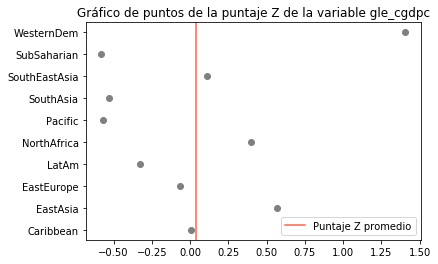

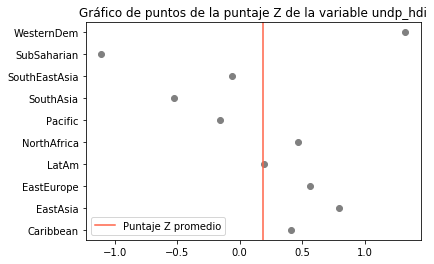

In [5]:
graficar_dotplot(df, "gle_cgdpc", "ht_region", True, "z_score")
graficar_dotplot(df, "undp_hdi", "ht_region", True, "z_score")

## Genere un método que devuelva un gráfico comparando dos curvas de densidad
- El método debe contener los siguientes argumentos:
    - df1 : Tabla de datos 1.
    - df2 : Tabla de datos 2.
    - variable : Variable a contrastar.
    - log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False.
- Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué? __Respuesta: Para los casos imf_pop y gle_cgdpc es mejor opción utilizar logaritmos ya que hay una gran diferencias en la escala de los valores__

In [16]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def grafico_comparativo(df1, df2, variable, log=False):
    
    if log:
        etiqueta = " (logaritmo)"
        temp1 = np.log(df1[variable].dropna())
        temp2 = np.log(df2[variable].dropna())
    else:
        etiqueta = ""
        temp1 = df1[variable].dropna()
        temp2 = df2[variable].dropna()
    
    plt.figure()
    plt.title("Histograma y curva de densidad para '" + variable + "'")
    plt.hist(temp1, color='tomato', alpha=.1, normed=True, label="Histograma tabla 1" + etiqueta)
    plt.hist(temp2, color='green', alpha=.1, normed=True, label="Histograma tabla 2" + etiqueta)
    
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)

    gauss_kde_df1 = gaussian_kde(temp1)
    gauss_kde_df2 = gaussian_kde(temp2)
    
    Z_df1 = np.reshape(gauss_kde_df1(x_axis).T, x_axis.shape)
    Z_df2 = np.reshape(gauss_kde_df2(x_axis).T, x_axis.shape)
    
    plt.plot(x_axis, Z_df1, color='tomato', lw=3, label="Curva densidad tabla 1" + etiqueta)
    plt.plot(x_axis, Z_df2, color='green', lw=3, label="Curva densidad tabla 2" + etiqueta)
    
    plt.legend()

### Comparación de curvas de densidad entre datos sample y base de datos completa

/home/danielf/Documents/Data Science/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/danielf/Documents/Data Science/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


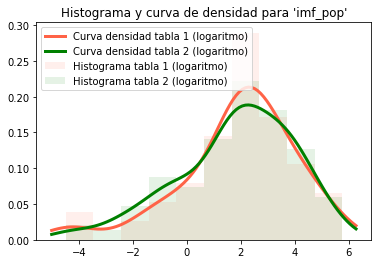

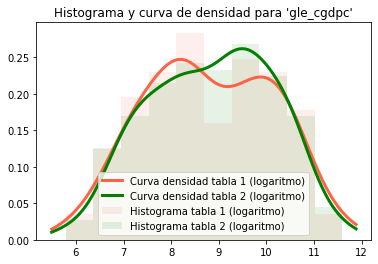

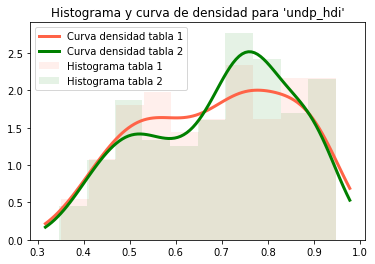

In [18]:
# Variables a analizar
variables = ["imf_pop", "gle_cgdpc", "undp_hdi"]

# Se comparan datos con datos originales

df_full = pd.read_csv("qog_std_cs_jan18.csv",  index_col=0)

display(Markdown("### Comparación de curvas de densidad entre datos sample y base de datos completa"))

grafico_comparativo(df, df_full, "imf_pop", True)
grafico_comparativo(df, df_full, "gle_cgdpc", True)
grafico_comparativo(df, df_full, "undp_hdi", False)